In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv')
data.head

<bound method NDFrame.head of                                                    teks  label
0     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...      2
1     2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...      2
2     2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...      2
3     2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...      2
4     4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...      2
...                                                 ...    ...
1138     Yooo sama2, oke nanti aku umumin di grup kelas      0
1139  😁 sebelumnya ga ad nulis kerudung. Kirain warn...      0
1140                               Mba mau kirim 300 ya      0
1141  nama1  beaok bwrangkat pagi...mau cas atay tra...      0
1142                         No bri atas nama kamu mana      0

[1143 rows x 2 columns]>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [5]:
print('Total SMS : ',data.shape[0],' Data\n')
print('Terdiri Dari (Label) : ')
print('[0] SMS Normal\t\t\t:',data[data.label==0].shape[0],' data')
print('[1] SMS Fraud / Penipuan\t:',data[data.label==1].shape[0],' data')
print('[2] SMS Promo\t\t\t:',data[data.label==2].shape[0],' data')

Total SMS :  1143  Data

Terdiri Dari (Label) : 
[0] SMS Normal			: 569  data
[1] SMS Fraud / Penipuan	: 335  data
[2] SMS Promo			: 239  data


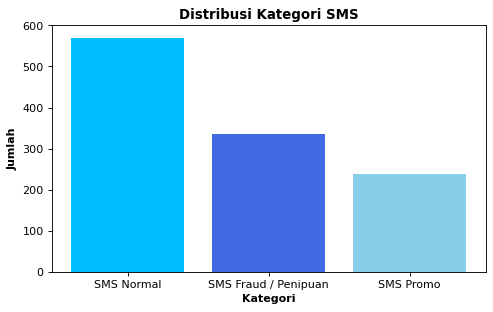

In [6]:
height=data['label'].value_counts()
labels=('SMS Normal','SMS Fraud / Penipuan','SMS Promo')
y_pos=np.arange(len(labels))

plt.figure(figsize=(7,4),dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori SMS',fontweight='bold')
plt.xlabel('Kategori',fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','skyblue'])
plt.xticks(y_pos,labels)
plt.show()

## TEXT PREPROCESSING

### Case Folding

In [7]:
import re

#Create function for case folding sequence
def casefolding(text):
  text=text.lower()
  text=re.sub(r'https?://\S+|www\.\S+','',text)
  text=re.sub(r'[-+]?[0-9]+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=text.strip()
  return text

In [8]:
raw_sample=data['teks'].iloc[5]
case_folding=casefolding(raw_sample)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)

Raw Data	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case Folding	:  hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel


### Word Normalization

In [9]:
key_norm=pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text=' '.join([key_norm[key_norm['singkat']==word]['hasil'].values[0]if(key_norm['singkat']==word).any()else word for word in text.split()])
  text=str.lower(text)
  return text

### Filtering (Stopword Removal)

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind=stopwords.words('indonesian')

In [11]:
len(stopwords_ind)

758

In [12]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [13]:
# Creating function for stopword removal sequence

more_stopword=['tsel','gb','rb'] # Adding more word in stopword list
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
  clean_words=[]
  text=text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [14]:
raw_sample=data['teks'].iloc[5]
case_folding=casefolding(raw_sample)
stopword_removal=remove_stop_words(case_folding)

print('Raw Data\t: ',raw_sample)
print('Case Folding\t: ',case_folding)
print('Stopword Removal\t: ',stopword_removal)

Raw Data	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case Folding	:  hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel
Stopword Removal	:  ekstra pulsa dg beli paket internet bulanan mytelkomsel utk pembelian sjk augsept cek detail promo tselmemytsel


### Stemming

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory=StemmerFactory()
stemmer=factory.create_stemmer()

#Creating function for Indonesian stemming sequence
def stemming(text):
  text=stemmer.stem(text)
  return text

In [16]:
raw_sample = data['teks'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding		:  hari lagi  ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel
Stopword removal	:  ekstra pulsa dg beli paket internet bulanan mytelkomsel utk pembelian sjk augsept cek detail promo tselmemytsel
Stemming		:  ekstra pulsa dg beli paket internet bulan mytelkomsel utk beli sjk augsept cek detail promo tselmemytsel


### Text Preprocessing Pipeline

In [17]:
def text_preprocessing_process(text):
  text=casefolding(text)
  text=text_normalize(text)
  text=remove_stop_words(text)
  text=stemming(text)
  return text

In [18]:
%%time
data['clean_teks']=data['teks'].apply(text_preprocessing_process)

CPU times: total: 8min 58s
Wall time: 9min 34s


In [19]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app extra ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,pulang hormat sisa kuota flash kb download myt...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [20]:
data.to_csv('clean_data.csv')

In [21]:
X=data['clean_teks']
y=data['label']

In [22]:
X

0       promo beli paket flash my telkomsel app extra ...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       pulang hormat sisa kuota flash kb download myt...
3       pulang hormat sisa kuota flash kb download myt...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [23]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

## Feature Extraction (TF-IDF & N-Gram)
Merubah teks menjadi vector menggunakan TF-IDF

In [24]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

vec_TF_IDF=TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf=vec_TF_IDF.transform(X)
pickle.dump(vec_TF_IDF.vocabulary_,open('feature_tf-idf.pkl','wb'))

In [25]:
vec_TF_IDF.vocabulary_

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2875,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2878,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3013,
 'sk': 2691,
 'rupiah': 2503,
 'ribu': 2452,
 'spesial': 2750,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2557,
 'november': 1989,
 'pulang': 2330,
 'hormat': 1116,
 'sisa': 2684,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2692,
 'ekstra': 804,
 'pulsa': 2332,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2690,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2841,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2869,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3129,
 'ultima': 3066,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2843,
 'tselmefl': 3011,
 'coboy': 568,
 'jr': 1329,

In [26]:
print(len(vec_TF_IDF.get_feature_names()))

3253


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(vec_TF_IDF.get_feature_names())

['aa', 'aamiiiin', 'aamiin', 'ab', 'abadi', 'abai', 'abbee', 'abdul', 'acara', 'acaratks', 'account', 'ada', 'adapromo', 'adi', 'adik', 'adison', 'admin', 'administrasi', 'adminlte', 'ado', 'adrian', 'adu', 'aduh', 'advertising', 'aea', 'aesthetic', 'afbe', 'affc', 'afr', 'afrika', 'agam', 'agen', 'agendain', 'agenpulsa', 'ags', 'agst', 'agsts', 'agt', 'agtskinfodlj', 'agua', 'agun', 'agus', 'agust', 'agustus', 'agustuskunjungi', 'ah', 'ahaha', 'ahub', 'aidzin', 'aigoo', 'air', 'aja', 'ajaa', 'ajaaa', 'ajabri', 'ajak', 'ajakin', 'ajar', 'ajeng', 'akademik', 'akang', 'akangteteh', 'akbar', 'akreditasi', 'akses', 'aksi', 'aktif', 'aktifasi', 'aktivasi', 'aktivitas', 'akucintaislam', 'akumulasi', 'akun', 'akurasi', 'akurat', 'ala', 'alaikum', 'alaikumsaya', 'alaiqum', 'alam', 'alamat', 'alami', 'alamsyah', 'alat', 'alesannya', 'algoritma', 'alhamdulillah', 'alhamdullilah', 'alhuda', 'ali', 'aliando', 'all', 'allah', 'allahaamiin', 'alphard', 'alquran', 'alur', 'aman', 'amanda', 'ambil', '

In [28]:
x1=vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf=pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_tabular_tf_idf.iloc[10:20,60:70]

,akang,akangteteh,akbar,akreditasi,akses,aksi,aktif,aktifasi,aktivasi,aktivitas
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.149204,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.262305,0.0,0.000000,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.000000,0.0,0.244053,0.0,0.382416,0.0
15,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


### Feature Selection

In [30]:
x_train=np.array(data_tabular_tf_idf)
y_train=np.array(y)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features=SelectKBest(chi2,k=3000)
X_kbest_features=chi2_features.fit_transform(x_train,y_train)

print('Original feature number : ',x_train.shape[1])
print('Reduced feature number : ',X_kbest_features.shape[1])

Original feature number :  3253
Reduced feature number :  3000


In [32]:
Data=pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.835608
1,0.419698
2,1.558607
3,0.716455
4,0.800674
...,...
3248,1.180239
3249,0.503162
3250,0.716455
3251,2.917381


In [33]:
feature=vec_TF_IDF.get_feature_names()
feature

Data['Fitur']=feature
Data

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.835608,aa
1,0.419698,aamiiiin
2,1.558607,aamiin
3,0.716455,ab
4,0.800674,abadi
...,...,...
3248,1.180239,zalora
3249,0.503162,zarkasi
3250,0.716455,zjt
3251,2.917381,zona


In [34]:
Data.sort_values(by='Nilai',ascending=False)

,Nilai,Fitur
2088,49.062970,paket
1030,46.324101,hadiah
1549,45.593560,kuota
2178,39.438431,pin
1486,34.448410,klik
...,...,...
1520,0.044910,kopi
307,0.044468,bca
1694,0.031579,maksimal
531,0.013783,cepat


In [35]:
mask=chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [36]:
new_feature=[]
for bool, f in zip(mask,feature):
  if bool:
    new_feature.append(f)
  selected_feature=new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajaaa',
 'ajabri',
 'ajak',
 'ajeng',
 'akang',
 'akangteteh',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alamsyah',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'ambil',
 'amin',


In [37]:
new_selected_feature={}

for (k,v) in vec_TF_IDF.vocabulary_.items():
  if k in selected_feature:
    new_selected_feature[k]=v

new_selected_feature

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2875,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2878,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3013,
 'sk': 2691,
 'rupiah': 2503,
 'ribu': 2452,
 'spesial': 2750,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2557,
 'november': 1989,
 'pulang': 2330,
 'hormat': 1116,
 'sisa': 2684,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2692,
 'ekstra': 804,
 'pulsa': 2332,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2690,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2841,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2869,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3129,
 'ultima': 3066,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2843,
 'tselmefl': 3011,
 'coboy': 568,
 'jr': 1329,

In [38]:
len(new_selected_feature)

3000

In [39]:
pickle.dump(new_selected_feature,open('selected_feature_tf-idf.sav','wb'))

In [40]:
data_selected_feature=pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acaratks,account,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data_selected_feature.iloc[10:20,60:70]

,aktif,aktifasi,aktivasi,aktivitas,akucintaislam,akumulasi,akun,akurasi,akurat,alaikum
10,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.149204,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.244053,0.0,0.382416,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
selected_x=X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Modelling (Machine Learning)

In [43]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [44]:
x=selected_x
y=data.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
print('Banyak data x_train : ',len(x_train))
print('Banyak data x_test : ',len(x_test))
print('Banyak data y_train : ',len(y_train))
print('Banyak data y_test : ',len(y_test))

Banyak data x_train :  914
Banyak data x_test :  229
Banyak data y_train :  914
Banyak data y_test :  229


In [46]:
from datetime import datetime
start_time=datetime.now()

text_algorithm=MultinomialNB()
model=text_algorithm.fit(x_train,y_train)

filename='model_sentiment_naive.sav'
pickle.dump(model,open(filename,'wb'))

end_time=datetime.now()
result_time=end_time-start_time
print("Duration : ",result_time)

Duration :  0:00:00.014991


In [47]:
predicted=model.predict(x_test)
predicted

array([0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2,
       0, 1, 2, 1, 0, 2, 0, 1, 1], dtype=int64)

### Model Evaluation

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

NewprediksiBenar=(predicted==y_test).sum()
NewprediksiSalah=(predicted!=y_test).sum()

print('Prediksi Benar : ',NewprediksiBenar,'Data')
print('Prediksi Salah : ',NewprediksiSalah,'Data')
print('Akurasi Algoritma : ',NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,'%')

CM=confusion_matrix(y_test,predicted)

TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
precision=TP/(TP+FP)
recall=TP/(TP+FN)

print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")

print(classification_report(y_test,predicted))

Prediksi Benar :  210 Data
Prediksi Salah :  19 Data
Akurasi Algoritma :  91.70305676855895 %
TRUE NEGATIVE (TN): 119
FALSE NEGATIVE (FN): 4
TRUE POSITIVE (TP): 59
FALSE POSITIVE (FP): 4
PRECISION: 93.65079365079364 %
RECALL: 93.65079365079364 %
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       126
           1       0.89      0.89      0.89        66
           2       0.84      0.86      0.85        37

    accuracy                           0.92       229
   macro avg       0.90      0.90      0.90       229
weighted avg       0.92      0.92      0.92       229



In [49]:
# Using Cross Validation to validating data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=2)
accuracy=(cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy=np.mean(accuracy)
print('Accuracy : ',accuracy)
print('Accuracy : ',score_accuracy)

Accuracy :  [0.92576419 0.91703057 0.93886463 0.93449782 0.90393013 0.93886463
 0.930131   0.930131   0.90829694 0.930131  ]
Accuracy :  0.9257641921397379


In [56]:
import pickle

pipeline=pickle.load(open('model_sentiment_naive.sav','rb'))

data_input=input("Masukan Sentimen:\n")
data_input=text_preprocessing_process(data_input)

loaded_vec=TfidfVectorizer(decode_error="replace",vocabulary=set(pickle.load(open('selected_feature_tf-idf.sav','rb'))))
hasil=pipeline.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
  s="SMS Normal"
elif(hasil==1):
  s="SMS Fraud"
else:
  s="SMS Promo"

print("Hasil Prediksi :\n",s)

Hasil Prediksi :
 SMS Fraud


In [57]:
filename="model-fraud.sav"
pickle.dump(hasil,open(filename,'wb'))